In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#  connect database
conn = sqlite3.connect('sales_data.db')

In [56]:
#  create a curcur object
cursor = conn.cursor()
print("connect to sqlite")

connect to sqlite


In [57]:
# close connection
conn.close

<function Connection.close()>

In [58]:
# upload table
data = pd.read_csv("/content/drive/MyDrive/Task/Task7/sales_data_sample.csv", encoding='latin-1')


In [59]:
#Now convert table in sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# import data into a table names sales
data.to_sql('sales',conn, if_exists='replace', index=False)

# conn.commit()
conn.close()
print("Table created successfully!")

Table created successfully!


In [61]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()



conn.close()

In [62]:
#  print columns from table

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

columns = [row[1] for row in cursor.execute("PRAGMA table_info(sales)")]

print(columns)


conn.close()

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [63]:
# find total sales

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute("select sum(`SALES`) from sales")
rows = cursor.fetchall()

for row in rows:
    print(row)

(10032628.85000001,)


In [64]:
#  print customer name
cursor.execute("select customername from sales group by customername")
rows = cursor.fetchall()
for row  in rows:
  print(row[0])

AV Stores, Co.
Alpha Cognac
Amica Models & Co.
Anna's Decorations, Ltd
Atelier graphique
Australian Collectables, Ltd
Australian Collectors, Co.
Australian Gift Network, Co
Auto Assoc. & Cie.
Auto Canal Petit
Auto-Moto Classics Inc.
Baane Mini Imports
Bavarian Collectables Imports, Co.
Blauer See Auto, Co.
Boards & Toys Co.
CAF Imports
Cambridge Collectables Co.
Canadian Gift Exchange Network
Classic Gift Ideas, Inc
Classic Legends Inc.
Clover Collections, Co.
Collectable Mini Designs Co.
Collectables For Less Inc.
Corporate Gift Ideas Co.
Corrida Auto Replicas, Ltd
Cruz & Sons Co.
Daedalus Designs Imports
Danish Wholesale Imports
Diecast Classics Inc.
Diecast Collectables
Double Decker Gift Stores, Ltd
Dragon Souveniers, Ltd.
Enaco Distributors
Euro Shopping Channel
FunGiftIdeas.com
Gift Depot Inc.
Gift Ideas Corp.
Gifts4AllAges.com
Handji Gifts& Co
Heintze Collectables
Herkku Gifts
Iberia Gift Imports, Corp.
L'ordine Souveniers
La Corne D'abondance, Co.
La Rochelle Gifts
Land of Toys

In [65]:
#  print country
cursor.execute("select country from sales group by country")
rows = cursor.fetchall()
for row  in rows:
  print(row[0])


Australia
Austria
Belgium
Canada
Denmark
Finland
France
Germany
Ireland
Italy
Japan
Norway
Philippines
Singapore
Spain
Sweden
Switzerland
UK
USA


In [66]:
# print teritory
cursor.execute("select territory from sales group by territory")
rows = cursor.fetchall()

for row in rows:
  print(row[0])

None
APAC
EMEA
Japan


In [67]:
# sale by product
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute("select productline, sum(sales) as total_sale_product from sales group by productline")
rows = cursor.fetchall()

for row in rows:
  print(row[0:2])

('Classic Cars', 3919615.659999997)
('Motorcycles', 1166388.3400000003)
('Planes', 975003.5700000001)
('Ships', 714437.13)
('Trains', 226243.46999999997)
('Trucks and Buses', 1127789.8399999996)
('Vintage Cars', 1903150.8399999992)


In [68]:
# find total revenue on the base on territory

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute("select territory,sum(QUANTITYORDERED*priceeach) as total_revenue from sales group by territory")
rows = cursor.fetchall()

for row in rows:
  print(row[0:2])


(None, 3179929.5499999993)
('APAC', 618304.01)
('EMEA', 4128005.419999996)
('Japan', 364647.81)


In [69]:
# totle sale on The base of status
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute("select status,sum(sales) as total_sale from sales group by status")
rows = cursor.fetchall()
for row in rows:
  print(row[0:2])

('Cancelled', 194487.48)
('Disputed', 72212.86)
('In Process', 144729.96000000002)
('On Hold', 178979.18999999994)
('Resolved', 150718.28000000003)
('Shipped', 9291501.080000008)


In [70]:
satus_data = pd.read_sql_query('select status,sum(sales) as total_sale from sales group by status', conn)
satus_data

,STATUS,total_sale
0,Cancelled,194487.48
1,Disputed,72212.86
2,In Process,144729.96
3,On Hold,178979.19
4,Resolved,150718.28
5,Shipped,9291501.08


<Axes: xlabel='STATUS'>

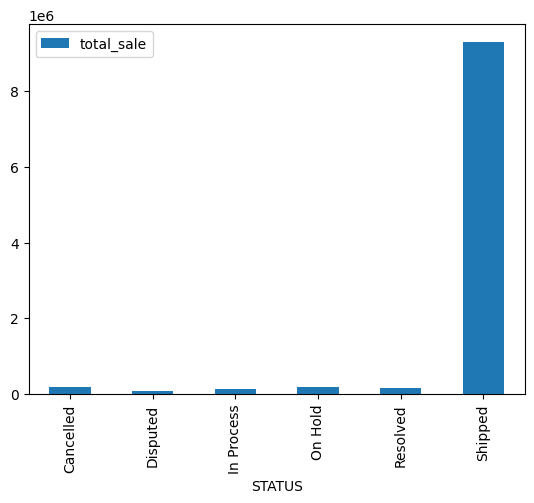

In [71]:

satus_data.plot(kind='bar', x='STATUS', y='total_sale')

In [72]:
# teritorry data

territory_data = pd.read_sql_query('select territory,sum(QUANTITYORDERED*priceeach) as total_revenue from sales group by territory', conn)
territory_data


,TERRITORY,total_revenue
0,None,3179929.55
1,APAC,618304.01
2,EMEA,4128005.42
3,Japan,364647.81


<Axes: xlabel='TERRITORY'>

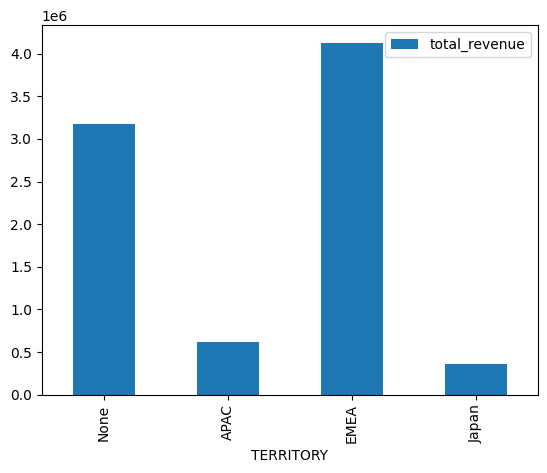

In [73]:
territory_data.plot(kind='bar', x='TERRITORY', y='total_revenue')

In [74]:
product_data = pd.read_sql_query('select productline, sum(sales) as total_sale_product from sales group by productline', conn)
product_data

,PRODUCTLINE,total_sale_product
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


<Axes: xlabel='PRODUCTLINE'>

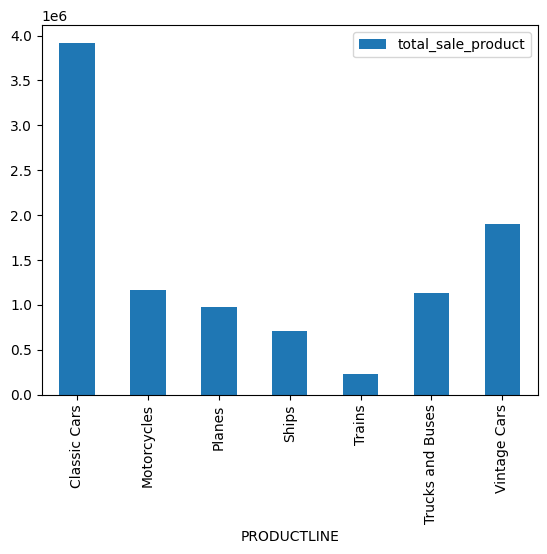

In [75]:
product_data.plot(kind='bar', x='PRODUCTLINE', y='total_sale_product')

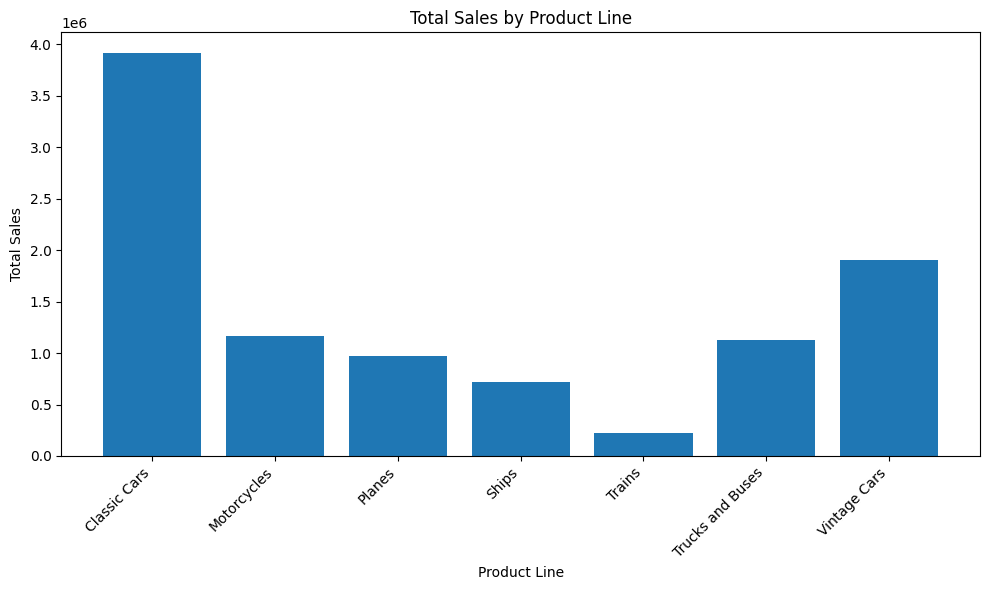

In [76]:
# plot with help matplotlib
# Using product_data DataFrame
plt.figure(figsize=(10, 6))
plt.bar(product_data['PRODUCTLINE'], product_data['total_sale_product'])
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()